# CS229: Lecture 2
**Linear Regression, Gradient Descent**

In this notebook we implement some of the concepts discussed in Lecture 2 of [CS229 - Machine Learning](https://see.stanford.edu/Course/CS229).

First we import the relevant Python modules. This notebook has been written assuming Python 3.5

In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import scale

A little searching leads us to the Portland housing prices [dataset](http://openclassroom.stanford.edu/MainFolder/courses/MachineLearning/exercises/ex3materials/ex3Data.zip) that's used as an example in the lecture. We load the dataset from the CSV file.

In [2]:
houses = pd.read_csv('house_prices.csv')

Let's plot the output variable (the price of a house) against each of the input variables (area in sq. feet, number of bedrooms) to get a little intuition about the data.

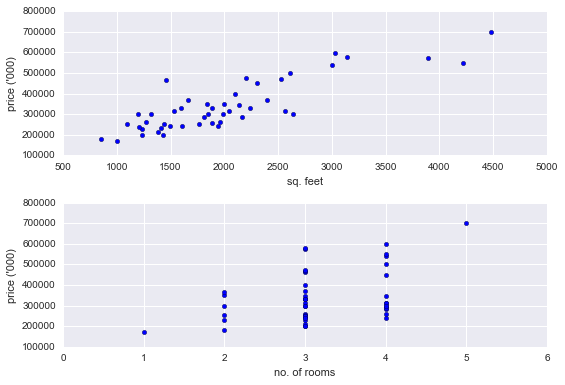

In [3]:
plt.figure(1)
plt.subplot(211)
plt.xlabel('sq. feet')
plt.ylabel('price (\'000)')
plt.scatter(houses['sqft'], houses['price'])
plt.subplot(212)
plt.xlabel('no. of rooms')
plt.ylabel('price (\'000)')
plt.scatter(houses['rooms'], houses['price'])
plt.tight_layout()

Let's transform our data into the right matrix format. Note that we add a column of one's to the $X$ matrix, to be multiplied with $\theta_0$.

In [4]:
X = houses[['sqft', 'rooms']].as_matrix()
X = np.column_stack([np.ones([X.shape[0]]), X])
y = houses[['price']].as_matrix().ravel()

Next we implement the hypothesis and cost functions and the parameter update using gradient descent.

In [5]:
# Hypothesis function
def h(theta, X):
    return np.matmul(X, theta)

# Cost function
def J(theta, X, y):
    d = h(theta, X) - y
    return 0.5 * np.dot(d, d.T)

# One step of gradient descent
def descend(theta, X, y, alpha=0.01):
    error = h(theta, X) - y
    t = theta - alpha * np.matmul(X.T, error)
    return t, np.dot(error, error.T)

We are now ready to fit the model using gradient descent. Let's initialize our parameters to 0 and run 50 iterations of gradient descent to see how it behaves.

In [6]:
theta = np.zeros([X.shape[1]])
for i in range(50):
    theta, cost = descend(theta, X, y)

    if i % 10 == 0:
        print("epoch: {0}, cost: {1}".format(i, cost))

print("epoch: {0}, cost: {1}".format(i, cost))
print("theta: {0}".format(theta))

epoch: 0, cost: 6165605522007.0
epoch: 10, cost: 3.2373534403050684e+139
epoch: 20, cost: 1.7643253908567016e+266
epoch: 30, cost: inf
epoch: 40, cost: inf
epoch: 49, cost: nan
theta: [ nan  nan  nan]


That doesn't look good. We expected the cost to steadily decrease as gradient descent progressed. Instead, the cost function diverged so much it exceeded our ability to represent it as a floating-point number. What happened?

The answer is that our training data is not on the right _scale_. The area in square feet is in the thousands, the number of rooms is 1-10 and the price is in the hundreds of thousands. With such widely varying numbers the gradient descent algorithm can overshoot the minimum and instead diverge to infinity.

The solution is to scale all of the variables to have mean of 0 and variance of 1. We can use the `scale` function from `sklearn` to do this.

In [7]:
X_scaled = scale(X)
y_scaled = scale(y)

We can plot the data again to visualize the effect of the scaling operation.

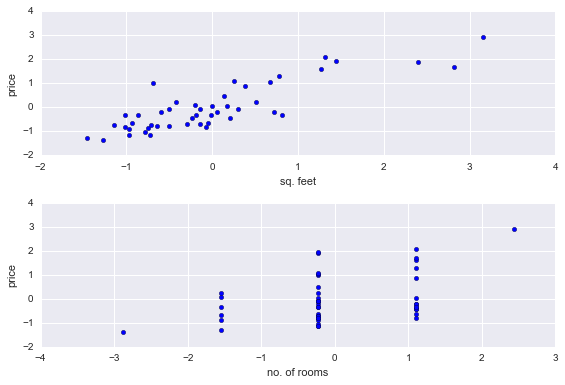

In [8]:
plt.figure(1)
plt.subplot(211)
plt.xlabel('sq. feet')
plt.ylabel('price')
plt.scatter(X_scaled[:, 1], y_scaled)
plt.subplot(212)
plt.xlabel('no. of rooms')
plt.ylabel('price')
plt.scatter(X_scaled[:, 2], y_scaled)
plt.tight_layout()

Let us write a function to fit the model such that it automatically stops once the improvement in the value of the cost function is below a certain threshold.

In [9]:
def fit(X, y):
    theta = np.zeros([X.shape[1]])
    theta, cost = descend(theta, X, y)
    
    for i in range(10000):
        cost_ = cost
        theta, cost = descend(theta, X, y)
        if cost_ - cost < 1e-7:
            break
            
        if i % 10 == 0:
            print("epoch: {0}, cost: {1}".format(i, cost))

    print("epoch: {0}, cost: {1}".format(i, cost))
    print("theta: {0}".format(theta))

Let's try to fit the model again with our scaled input and output matrices.

In [10]:
fit(X_scaled, y_scaled)

epoch: 0, cost: 20.079774540230776
epoch: 10, cost: 12.607192671309607
epoch: 20, cost: 12.552124442287859
epoch: 30, cost: 12.551589402068807
epoch: 38, cost: 12.551584281495716
theta: [ 0.          0.88472172 -0.05313455]


Success!

The gradient descent converges in just 38 steps.

We can verify that our solution is correct by fitting the same data using the library functions for linear regression in `sklearn`.

In [11]:
from sklearn.linear_model import LinearRegression

l = LinearRegression(fit_intercept=False)
l.fit(X_scaled, y_scaled)
l.coef_

array([ 0.        ,  0.88476599, -0.05317882])

The parameters are close enough to consider our solution correct.